In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

## Лабораторная работа №3: Классификация $kNN$

[Лекция](../lectures/lecture_3/lecture_3.ipynb)

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Возможно, потребуется использовать два датасета: один для бинарной классификации, второй для многоклассовой.

2. Бинарная классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для всех последующих манипуляций.
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.
     > Далее используем нормализованные данные.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
     > Естественно, искомые результаты - улучшение метрик.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации
   
     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
      > данных - исходных данных до разбиения

     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.
   - Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

### Примечание

Один из вариантов фильтрации признаков в смысле важности (aka `feature importance`): 
- В матрице корреляции $M_{corr}$ занулить элементы главной диагонали.
- Задать значение порога $T_{corr}$ - значение корреляции одного признака с другим.
- Отфильтровать $abs(M_{corr})$ по порогу $T_{corr}$.
- Сгруппировать отфильтрованные значения по каждому признаку (вычислить сумму или среднее, например), получаем $F$ - "список фичей", - типа `Series`: индекс - название признака, значение - `feature importance`.
- Отсортировать $F$ по убыванию: $F_{sorted} = sort(F)$.
- Задать значение порога $T_{filter}$, например $T_{filter} = 0$. Можно построить график.
- $F_{sorted}[F_{sorted} > T_{filter}]$ - искомый список признаков. $F_{sorted}.index$ можно использовать для фильтрации датафрейма по признакам.

Источники:
 - [Find high correlations in a large coefficient matrix](https://stackoverflow.com/a/61956415)
 - [Returning the highest and lowest correlations from a correlation matrix in pandas](https://stackoverflow.com/a/55731198)
 - [pandas.DataFrame.lt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.lt.html)

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Описание набора данных
| № | Признак |  |
| --- | --- | --- |
| 1. | Age  | [years] |
| 2. | Sex  | [M: Male, F: Female] |
| 3. | ChestPainType  | [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| 4. | RestingBP  | [mm Hg] |
| 5. | Cholesterol | [mm/dl] |
| 6. | FastingBS | [1: if FastingBS > 120 mg/dl, 0: otherwise] |
|7. | RestingECG | [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| 8. | MaxHR | [Numeric value between 60 and 202] |
| 9. | ExerciseAngina | [Y: Yes, N: No] |
| 10. | Oldpeak | [Numeric value measured in depression] |
| 11. | ST_Slope | [Up: upsloping, Flat: flat, Down: downsloping] |
| 12. | HeartDisease | [1: heart disease, 0: Normal] |

Загрузим набор данных

In [2]:
df = pd.read_csv("knn_data/heart.csv", sep=",")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Посмотрим на описательные статистики

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

Закодируем категориальные переменные

In [7]:
cat_variables=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

df_encoded = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [8]:
df_encoded.shape

(918, 21)

In [9]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Выделим данные для обучения модели

In [10]:
X = df_encoded.drop(['HeartDisease'], axis=1)
y = df_encoded['HeartDisease']

In [11]:
X.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
Sex_F                   bool
Sex_M                   bool
ChestPainType_ASY       bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_LVH          bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_N        bool
ExerciseAngina_Y        bool
ST_Slope_Down           bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object

Разделим данные на тренировочные и тестовые

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создадим и обучим модель. Выберем количество neighbors равное 3.

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        77
           1       0.68      0.71      0.70       107

    accuracy                           0.64       184
   macro avg       0.63      0.63      0.63       184
weighted avg       0.64      0.64      0.64       184



D:\PyThOn\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\PyThOn\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\PyThOn\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\PyThOn\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\PyThOn\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Классификатор работает так себе... Попробуем нормализовать данные с помощью StandardScaler и снова посмотреть на метрики.

In [15]:
scaler = StandardScaler()
X_cat = X.select_dtypes(include=['bool'])
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=['int64', 'float64'])), columns=X.select_dtypes(include=['int64', 'float64']).columns)

X_scaled = pd.concat([X_scaled.reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



Ура! Метрики значительно улучшились. Выведем матрицу корреляции и попробуем избавиться от некоторых признаков.

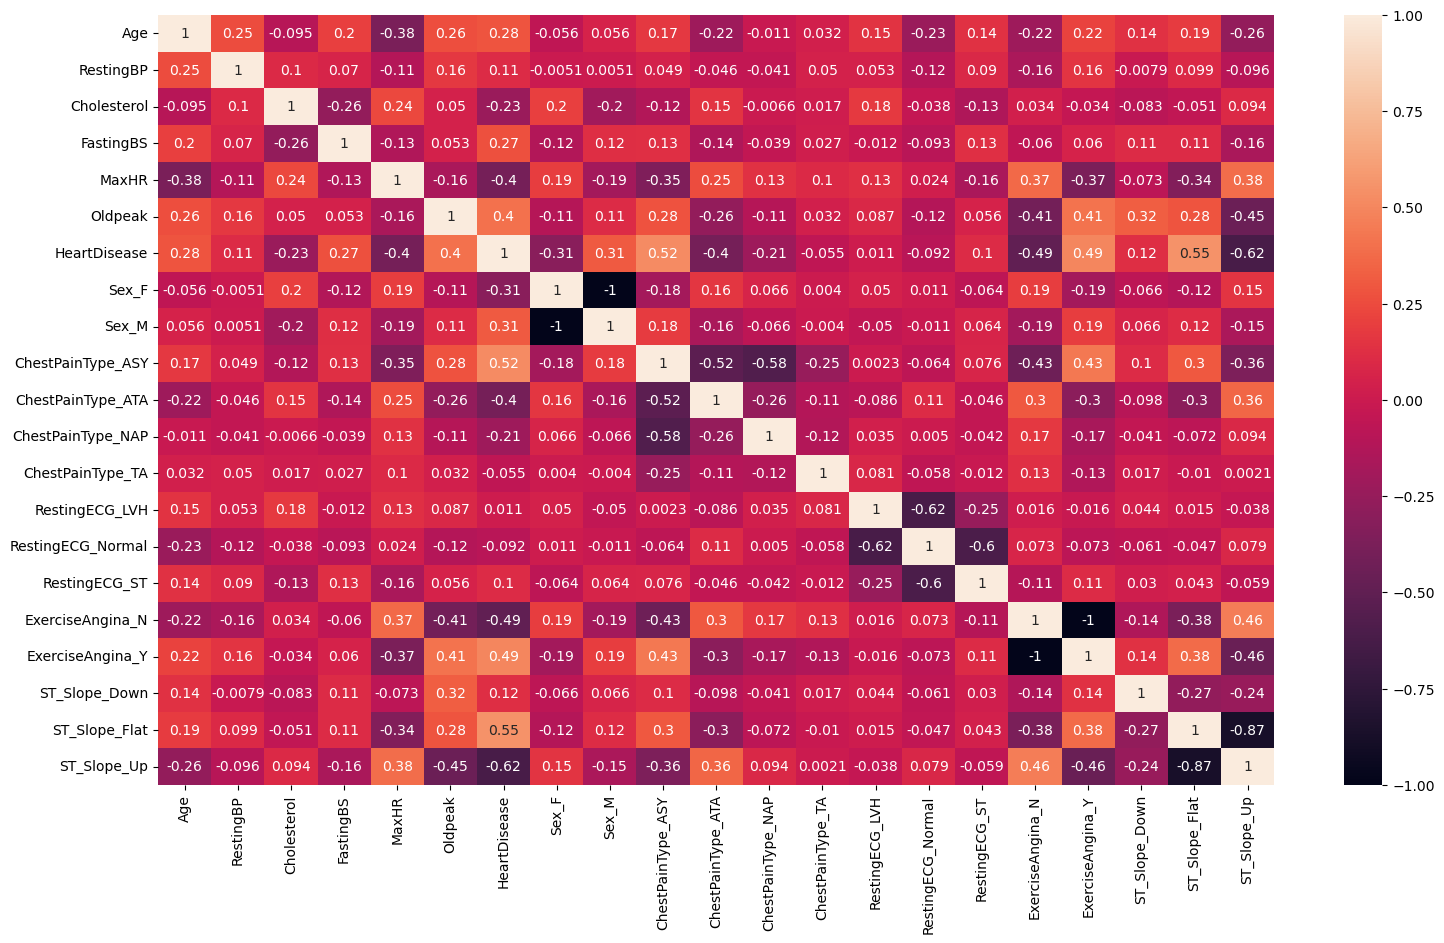

In [18]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
X_scaled.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [20]:
X_opt = X_scaled.drop(['RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST'], axis=1)
X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_opt, y, test_size=0.2, random_state=0)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_opt, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
preds = knn.predict(X_test_opt)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.87      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



После удаления признака RestingECG метрики немного ухудшились. Теперь попробуем найти оптимальное значение neighbors.

In [23]:
train_scores = []
test_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_validate(knn, X_opt, y, cv=5, return_train_score=True)
    
    train_scores.append(np.mean(scores["train_score"]))
    test_scores.append(np.mean(scores["test_score"]))

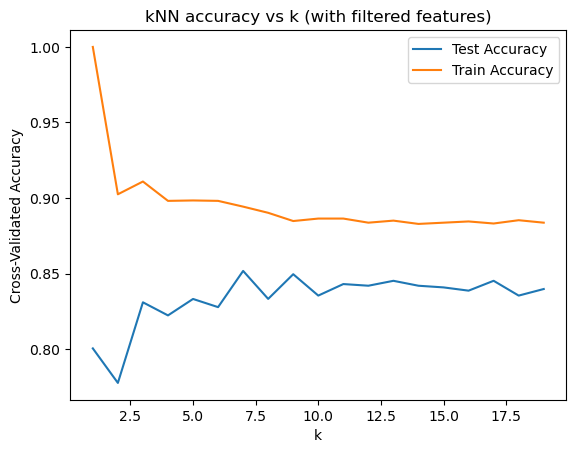

In [24]:
plt.plot(range(1, 20), test_scores, label="Test Accuracy")
plt.plot(range(1, 20), train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend();

При k равным 7 accuracy максимальна и составляет примерно 0.85

### Многоклассовая классификация 

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

| Признак | Описание | |
| --- | --- | --- |
| species | penguin species | (Chinstrap, Adélie, or Gentoo) |
| culmen_length_mm | culmen length | (mm) |
| culmen_depth_mm | culmen depth | (mm) |
| flipper_length_mm | flipper | length (mm) |
| body_mass_g | body mass | (g) |
| island | island name | (Dream, Torgersen, or Biscoe) |
| sex | penguin sex | |

Загрузим данные

In [25]:
df = pd.read_csv("knn_data/penguins_size.csv", sep=",")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Выведем описательные статистики

In [27]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [28]:
df.duplicated().sum()

0

Обработаем пропуски в данных

In [29]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    df[item].fillna(df[item].mean(), inplace=True)
    
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [30]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [31]:
df.sex.value_counts()

sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64

In [32]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [33]:
df.loc[336,'sex'] = 'FEMALE'
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.20000,14.10000,217.000000,4375.000000,FEMALE
335,Gentoo,Biscoe,55.10000,16.00000,230.000000,5850.000000,MALE
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,FEMALE
337,Gentoo,Biscoe,48.80000,16.20000,222.000000,6000.000000,MALE
338,Gentoo,Biscoe,47.20000,13.70000,214.000000,4925.000000,FEMALE
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo,Biscoe,49.90000,16.10000,213.000000,5400.000000,MALE


Закодируем данные

In [34]:
le = LabelEncoder()

cat_variables = ['island', 'sex']

df['species'] = le.fit_transform(df['species'])

df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,True
1,0,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,0,40.30000,18.00000,195.000000,3250.000000,False,False,True,True,False
3,0,43.92193,17.15117,200.915205,4201.754386,False,False,True,False,True
4,0,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False


In [35]:
df.shape

(344, 10)

Выделим данные для обучения

In [36]:
X = df.drop(['species'], axis=1)
y = df['species']

Нормализуем и разделим данные на тренировочные и тестовые

In [37]:
scaler = StandardScaler()

X_cat = X.select_dtypes(include=['bool'])
X_scaled = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=['int64', 'float64'])), columns=X.select_dtypes(include=['int64', 'float64']).columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [38]:
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,False,False,True,False,True
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,False,False,True,True,False
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,False,False,True,True,False
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,False,False,True,False,True
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,False,False,True,True,False


Создадим и обучим модель

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00        37

    accuracy                           0.98       104
   macro avg       0.96      0.99      0.97       104
weighted avg       0.98      0.98      0.98       104



Метрики получились довольно хорошие. Попробуем получить все метрики равные 1.

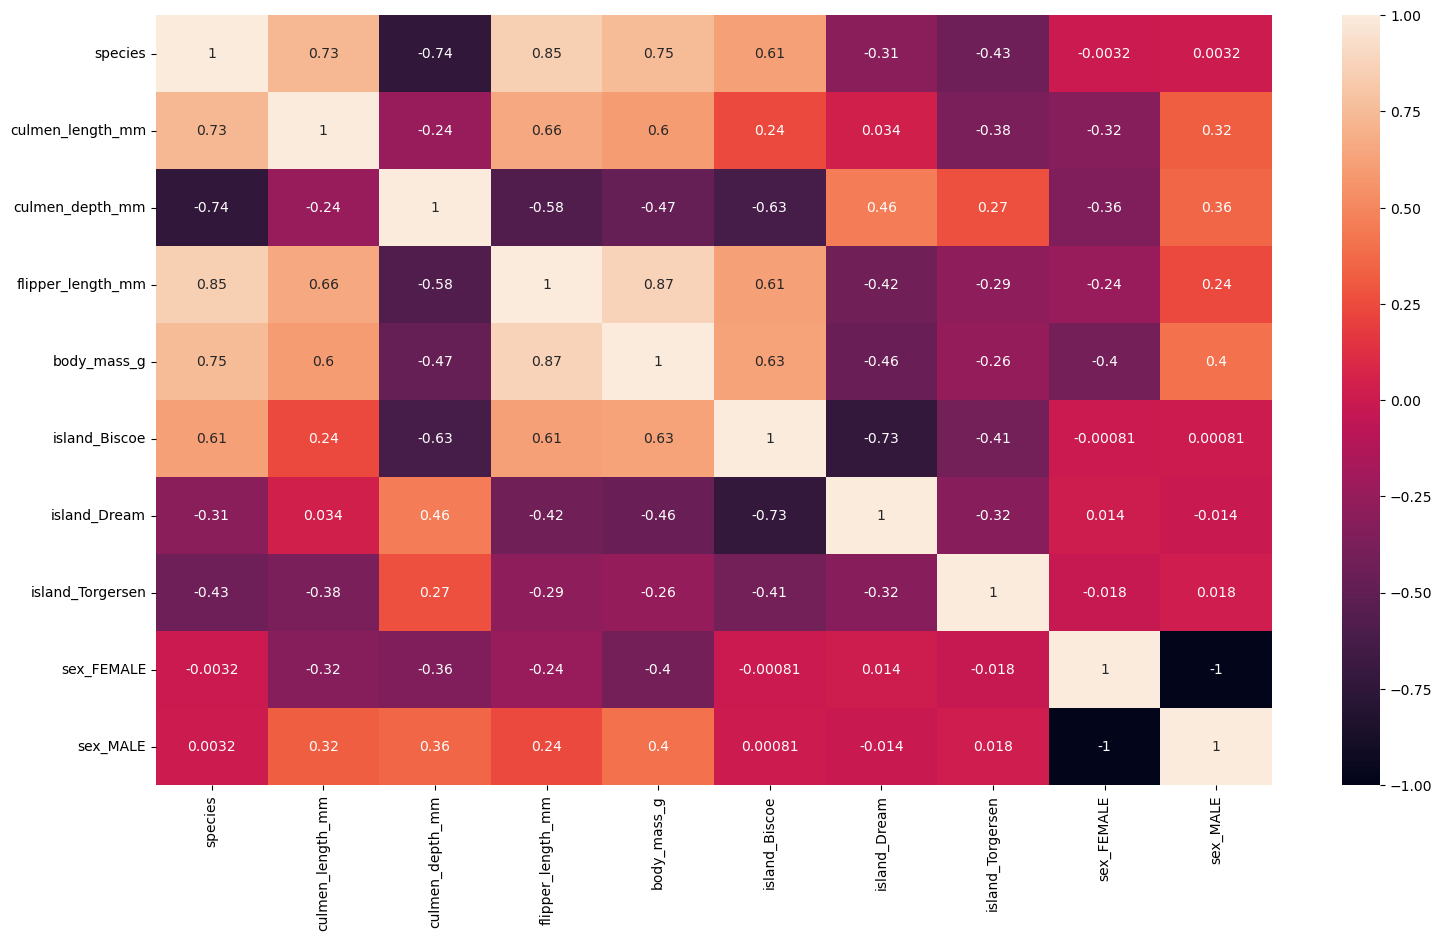

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [42]:
X_scaled.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [43]:
X_opt = X_scaled.drop(['sex_FEMALE', 'sex_MALE'], axis=1)

X_train_opt, X_test_opt, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=0)

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_opt, y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
preds = knn.predict(X_test_opt)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



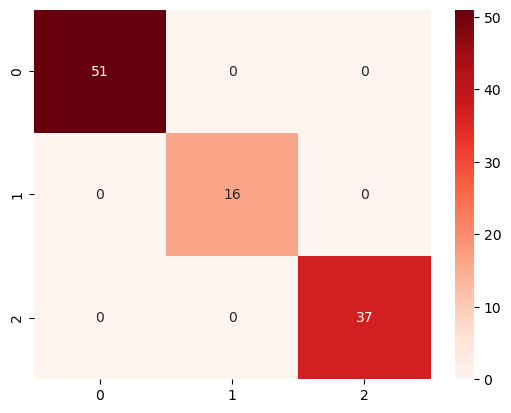

In [46]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Reds');

Ура! Все метрики равны 1. Теперь попробуем перебрать значения neighbors в некотором диапазоне и выбрать наилучшее.

In [47]:
train_scores = []
test_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_validate(knn, X_opt, y, cv=5, return_train_score=True)
    
    train_scores.append(np.mean(scores["train_score"]))
    test_scores.append(np.mean(scores["test_score"]))

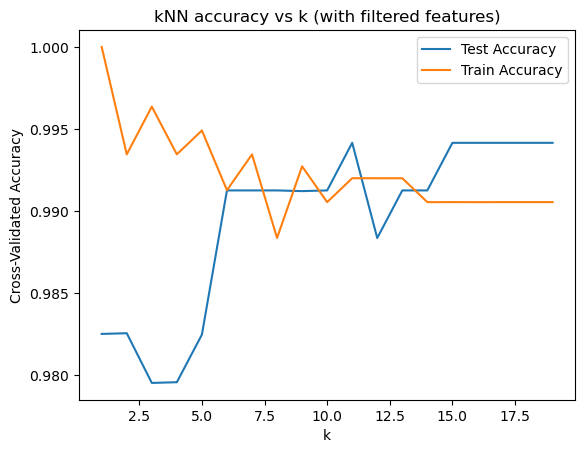

In [48]:
plt.plot(range(1, 20), test_scores, label="Test Accuracy")
plt.plot(range(1, 20), train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend();

При параметре k равным 11 достигается первый максимум точности

In [49]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_opt, y_train)

KNeighborsClassifier(n_neighbors=11)

In [50]:
preds = knn.predict(X_test_opt)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



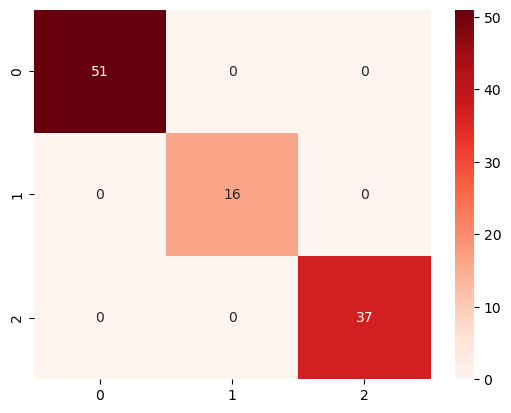

In [51]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Reds');